# Google Play Store Apps

The Objective of this project is to detect which app that will have large number of install based on many features such as (Rating , Category ,Size , Type) , 
- This Project is Done By Sarah Alodan
- This Project has 3 parts :
**Part1 : EDA
**Part2 : Visulization
**Part3 : Modeling

### DataSet

The dataset is provided in .csv format. It contains 10,842 records and  13 columns.
The columns are :
   - **App**: Name of app
   - **Rating**: Rating average (0 to 5)
   - **Reviews**: Number of reviews
   - **Size**: Size of app (kb or mb)
   - **Installs**: Number of downloads
   - **Type**: Free or Paid
   - **Price**: Price of app
   - **Content Rating**: Everyone, Teen,...
   - **Category**: Category of app
   - **Genres**: 1 app can belong to many Categories
   - **Last Updated**: Last update app (date)
   - **Current Ver**: Current Version (x.x.x)
   - **Android Ver**: Android Version (x.x.x)

## Part1 : EDA 

In [1]:
# importing the necessary libraraies
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
## Loading Data
Data = pd.read_csv('googleplaystore.csv')

## Observe 5 First Rows & Last 5 Rows
Data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
Data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
## information of Dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Based on the information done above , We need to do the following things :** 
1. Size Column :Remove character "M" and it should be numeric and unify the scale M convert to K.
2. install : Remove + sign and it should be numeric. 
3. Current Version , Andriod Ver and price are unnecessary Columns
4. Last Updated: Extract the year and month from this column.

In [10]:
## How Many Rows and Columns in this DataSet . 
Data.shape

(10841, 13)

In [11]:
## Take Copy Of the Data to WorkOn
AppData = Data.copy()

# Drop Unessersy Columne
AppData = AppData.drop(['Current Ver', 'Android Ver'], axis = 1)
AppData

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


## 1.1 Cleaning Data

### 1.1.1 Change DataType 

#### Size Column

In [12]:


# Sperate the digit of the scale on size 
Size_Scale = AppData['Size'].apply(lambda x: x[-1])
AppData['Size'] = AppData['Size'].apply(lambda x: x[:-1])

## I want to add Size_ScaleColumn after Size not at the end
AppData.insert(loc=4, column='Size_Scale', value=Size_Scale)
AppData.head()


,App,Category,Rating,Reviews,Size_Scale,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,M,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,M,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,M,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,M,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,M,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [89]:
##AppData['Size2'] = AppData['Size2'].str.replace('Varies with devic', '0')

In [14]:
##replace the outliers with 0 and later I will replace with Mean

AppData['Size'] = AppData['Size'].apply(lambda x : 0 if (len(x) > 5) else x)

AppData['Size']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836     53
10837    3.6
10838    9.5
10839      0
10840     19
Name: Size, Length: 10841, dtype: object

In [15]:
## Change the data type to float 
AppData['Size'] = AppData['Size'].str.replace(',', '')
AppData['Size'] = AppData['Size'].apply(pd.to_numeric)

In [16]:
## Unify the Scale by Convert M to K 
AppData['Size'] = np.where(AppData['Size_Scale'] == 'M',
                                           AppData['Size'] * 1024,
                                           AppData['Size'])

In [17]:
AppData['Size']

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        NaN
10840    19456.0
Name: Size, Length: 10841, dtype: float64

#### Installs Column

In [18]:
## Remove + Sign

AppData['Installs'] = AppData['Installs'].apply(lambda x: x[:-1])
AppData['Installs'] 

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [19]:
## Change the data type to int 
AppData['Installs'] = AppData['Installs'].str.replace(',', '')
## If there is charachter values replace it with 0 and later I will replace it with Mean
AppData['Installs'] = np.where(AppData['Installs'].str.isnumeric()==False,0,AppData['Installs'])
AppData['Installs']  = AppData['Installs'] .apply(pd.to_numeric)

In [20]:
AppData['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int64

#### Generse Column

In [24]:
 ## Instead of listed how many category the app belong to , I write the number of categories .
AppData['Genres2'] = 1 + AppData['Genres'].str.count(";")

#### Review Column

In [25]:
## 3.0M Value How to Handle it
AppData['Reviews'] = np.where(AppData['Reviews'].str.isnumeric()==False ,AppData['Reviews'].str.split('.').str[0]+ '000000',AppData['Reviews'])
###AppData['Reviews'].str.split('.').str[0]
###AppData['Reviews'] = AppData['Reviews'].str.replace('.', '')
AppData['Reviews']  = AppData['Reviews'] .apply(pd.to_numeric)

In [26]:
AppData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_Scale      10841 non-null  object 
 5   Size            9146 non-null   float64
 6   Installs        10841 non-null  int64  
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Genres2         10841 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 1.1+ MB


#### Last Updated Column

In [27]:
## Extract Year 
AppData['LastUpdated_Year'] = AppData['Last Updated'].str.split(',').str[1]
## Change DataType From Oject to Int
AppData['LastUpdated_Year'] = pd.to_numeric(AppData['LastUpdated_Year'])
## Check Value
AppData.LastUpdated_Year.value_counts()


2018.00    7349
2017.00    1867
2016.00     804
2015.00     459
2014.00     209
2013.00     110
2012.00      26
2011.00      15
2010.00       1
Name: LastUpdated_Year, dtype: int64

In [28]:
##Extract Month
AppData['LastUpdated_Month'] = AppData['Last Updated'].str.split(' ').str[0]
AppData.LastUpdated_Month.value_counts()



July         3163
August       1594
June         1273
May           978
March         667
April         616
February      533
January       491
December      426
October       398
November      387
September     314
1.0.19          1
Name: LastUpdated_Month, dtype: int64

In [30]:
AppData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                10841 non-null  object 
 1   Category           10841 non-null  object 
 2   Rating             9367 non-null   float64
 3   Reviews            10841 non-null  int64  
 4   Size_Scale         10841 non-null  object 
 5   Size               9146 non-null   float64
 6   Installs           10841 non-null  int64  
 7   Type               10840 non-null  object 
 8   Price              10841 non-null  object 
 9   Content Rating     10840 non-null  object 
 10  Genres             10841 non-null  object 
 11  Last Updated       10841 non-null  object 
 12  Genres2            10841 non-null  int64  
 13  LastUpdated_Year   10840 non-null  float64
 14  LastUpdated_Month  10841 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


In [31]:
## Delete Rows with 1.0.19 Month ?!
AppData = AppData [AppData.LastUpdated_Month != '1.0.19']
AppData.LastUpdated_Month.value_counts()

July         3163
August       1594
June         1273
May           978
March         667
April         616
February      533
January       491
December      426
October       398
November      387
September     314
Name: LastUpdated_Month, dtype: int64

In [32]:
## Check Data Typ After Changing 
AppData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                10840 non-null  object 
 1   Category           10840 non-null  object 
 2   Rating             9366 non-null   float64
 3   Reviews            10840 non-null  int64  
 4   Size_Scale         10840 non-null  object 
 5   Size               9145 non-null   float64
 6   Installs           10840 non-null  int64  
 7   Type               10839 non-null  object 
 8   Price              10840 non-null  object 
 9   Content Rating     10840 non-null  object 
 10  Genres             10840 non-null  object 
 11  Last Updated       10840 non-null  object 
 12  Genres2            10840 non-null  int64  
 13  LastUpdated_Year   10840 non-null  float64
 14  LastUpdated_Month  10840 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


### 1.1.2 Outliers and Missing Value

In [34]:
## Check Correlation
## Check Outliers 
AppData.describe()

,Rating,Reviews,Size,Installs,Genres2,LastUpdated_Year
count,9366.00,10840.00,9145.00,10840.00,10840.00,10840.00
mean,4.19,444152.90,22032.55,15464338.88,1.05,2017.40
std,0.52,2927760.60,23131.22,85029361.40,0.21,1.10
min,1.00,0.00,8.50,0.00,1.00,2010.00
25%,4.00,38.00,5017.60,1000.00,1.00,2017.00
50%,4.30,2094.00,13312.00,100000.00,1.00,2018.00
75%,4.50,54775.50,30720.00,5000000.00,1.00,2018.00
max,5.00,78158306.00,102400.00,1000000000.00,2.00,2018.00


We Noticed Here on the **Rating Column** There is Outliers since the scale Must be between 0 - 5 and here the max Value = 19 
I will replace values Greater than 5 with the mean
**Installs** Since  I replace above the wrong entries with 0 , I will change it to the mean.
on the **Reviews** also there are outliers since the differences between the mean and median are big

In [35]:
# Check for Null values
AppData.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_Scale              0
Size                 1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Genres2                 0
LastUpdated_Year        0
LastUpdated_Month       0
dtype: int64

#### Type Column


In [36]:
AppData.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [38]:
## Since the 0 Type is less than 3% I will delete it 
AppData=AppData[AppData.Type != '0']
## Replace NA Vaule with Free
AppData.Type.fillna('Free',inplace=True)
AppData.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

#### Rating Column

In [40]:
## Replace the outliers with median 
AppData['Rating'] = np.where(AppData['Rating']>5 ,4.30 ,AppData['Rating'])
AppData.describe()

,Rating,Reviews,Size,Installs,Genres2,LastUpdated_Year
count,9366.00,10840.00,9145.00,10840.00,10840.00,10840.00
mean,4.19,444152.90,22032.55,15464338.88,1.05,2017.40
std,0.52,2927760.60,23131.22,85029361.40,0.21,1.10
min,1.00,0.00,8.50,0.00,1.00,2010.00
25%,4.00,38.00,5017.60,1000.00,1.00,2017.00
50%,4.30,2094.00,13312.00,100000.00,1.00,2018.00
75%,4.50,54775.50,30720.00,5000000.00,1.00,2018.00
max,5.00,78158306.00,102400.00,1000000000.00,2.00,2018.00


In [41]:
## Replace NA Value with median
Mean_Rating=AppData.Rating.median()
AppData.Rating.fillna(Mean_Rating,inplace=True)

#### Installs Column

In [42]:
## Replace the outliers with median 
AppData['Installs'] = np.where(AppData['Installs'] == 0 ,100000 ,AppData['Installs'])
AppData.describe()

,Rating,Reviews,Size,Installs,Genres2,LastUpdated_Year
count,10840.00,10840.00,9145.00,10840.00,10840.00,10840.00
mean,4.21,444152.90,22032.55,15464477.26,1.05,2017.40
std,0.48,2927760.60,23131.22,85029336.31,0.21,1.10
min,1.00,0.00,8.50,1.00,1.00,2010.00
25%,4.10,38.00,5017.60,5000.00,1.00,2017.00
50%,4.30,2094.00,13312.00,100000.00,1.00,2018.00
75%,4.50,54775.50,30720.00,5000000.00,1.00,2018.00
max,5.00,78158306.00,102400.00,1000000000.00,2.00,2018.00


#### Size Column

In [43]:
## Replace NA Value with Mean
Mean_Size=AppData.Size.mean()
AppData.Size.fillna(Mean_Size,inplace=True)

In [44]:
## Let Check Now the Missing Value Again
AppData.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_Scale           0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Genres2              0
LastUpdated_Year     0
LastUpdated_Month    0
dtype: int64

**Great ! No Missing Value**

In [45]:
## Check How Many Category we have
AppData.Category.value_counts()


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

## Part2 : Visualization

<AxesSubplot:xlabel='Type', ylabel='count'>

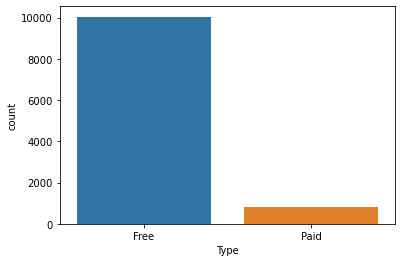

In [50]:
sns.countplot(x ='Type',data=AppData ) 

This bar graph shows our data has more free app than Paid app.

<AxesSubplot:xlabel='LastUpdated_Year', ylabel='count'>

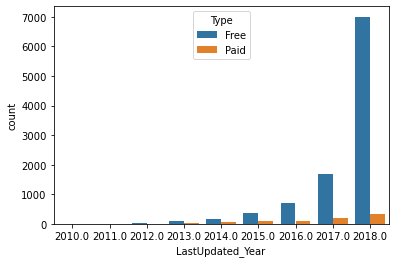

In [94]:
sns.countplot(x ='LastUpdated_Year',data=AppData ,hue = 'Type') 

This graph shows App Updated or Added Over The Years

<AxesSubplot:title={'center':'The most 10 App Categories in Dataset'}>

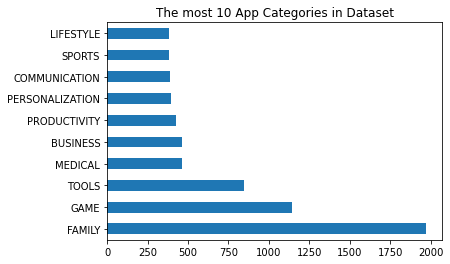

In [55]:
AppData['Category'].value_counts()[:10].plot(kind='barh', title= 'The most 10 App Categories in Dataset')

This Horizental Bar chart shows the most 10 frequncy categories in our dataset. However , this Actully has no value in analysis the data we must see which Category has large numer of install ? Which category has large number of reviews and High rating then we will show this in the following bar chart.

<AxesSubplot:title={'center':'The most  10 Installed App Categories'}, ylabel='Category'>

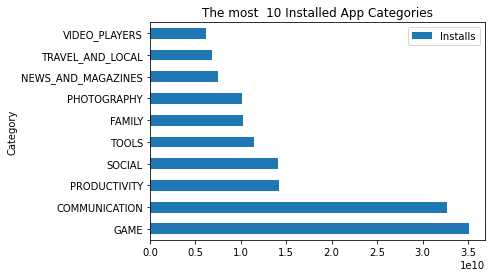

In [56]:
AppData.groupby('Category')[['Installs']].sum().sort_values('Installs', ascending = [False])[:10].plot(kind='barh', title= 'The most 10 Installed App Categories')

<AxesSubplot:title={'center':'The most  10 Rating App Categories'}, ylabel='Category'>

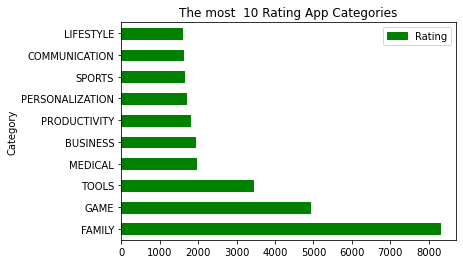

In [335]:
AppData.groupby('Category')[['Rating']].sum().sort_values('Rating', ascending = [False])[:10].plot(kind='barh', title= 'The most  10 Rating App Categories', Color='g')

Here the the app category order has changed . In fact , it will depend on area which want to analysis .


<AxesSubplot:title={'center':'App Added or Updated over the years'}>

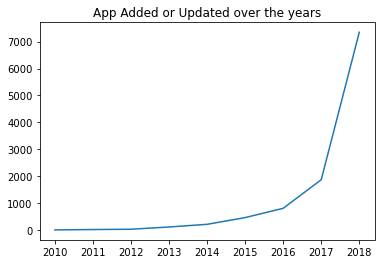

In [321]:
AppData['LastUpdated_Year'].value_counts().plot(kind='line',title='App Added or Updated over the years')

This graph shows Most App are Updated. Because if the app has not be updated will not may be  OS , Or it will has problems or 

<AxesSubplot:>

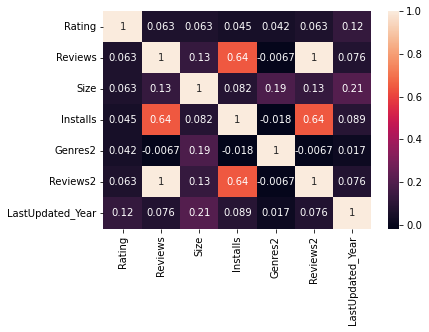

In [336]:
#Check Correlation
sns.heatmap(AppData.corr(),annot=True,)

This shows our features have no correlation with installs except the reviews has Moderete correlation .
That means app owners hould encourage the users to write reviews on thier app . Many reviews leads to have many installs. Some people choose the app based on reviews .
There are week correlation on LastUpdated Year and rating , LastUpdated Year and Size 

## Part 3 Modeling

In [79]:
## Prepare Data For Modeling 
##Convert categorical variable into dummy/indicator variables.
AppData_Test = AppData[['Category','Rating','Installs','Size','Reviews','Genres2','Type']]
df = pd.get_dummies(AppData_Test)

In [80]:
df.head()

,Rating,Installs,Size,Reviews,Genres2,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid
0,4.10,10000,19456.00,159,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.90,500000,14336.00,967,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.70,5000000,8908.80,87510,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.50,50000000,25600.00,215644,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.30,100000,2867.20,967,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
# split to Features and Target
X=df.drop('Installs',axis=1)
y=df['Installs']

In [83]:
## split to Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=110)

Since i have in my dataset Diffrenet Column Units I have to do the feature Scaling

In [84]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [86]:
lr.intercept_

15089585.606782733

In [93]:
lr.coef_

array([ 7.08923957e+05,  1.45405523e+06,  5.35809069e+07, -1.48427736e+05,
       -7.44296995e+16, -8.44119240e+16, -6.84971287e+16, -1.42213863e+17,
       -1.96842502e+17, -7.22633671e+16, -1.76749080e+17, -1.38191236e+17,
       -1.12156301e+17, -1.15360645e+17, -7.37148305e+16, -3.70296096e+17,
       -1.70118551e+17, -1.00350714e+17, -2.95746246e+17, -1.68637509e+17,
       -8.80798092e+16, -8.62660077e+16, -1.77312188e+17, -1.07888440e+17,
       -1.94590513e+17, -1.55888621e+17, -7.44296995e+16, -1.82561608e+17,
       -1.68934902e+17, -1.86054189e+17, -1.50245102e+17, -1.56213531e+17,
       -1.78989226e+17, -2.57411316e+17, -1.47506261e+17, -1.22774461e+17,
       -8.18724128e+16, -2.52104405e+19, -2.52104405e+19])

The coefficients represent associations, not causations. Most associations feature  rating

In [89]:
## Model Evalution
lr.score(X_train_scaled,y_train)

0.4491677209750744

In [90]:
lr.score(X_test_scaled,y_test)

0.36511929980226143

I think the model is underfitting . I have to Increase the amount of training data examples and select fewer  feature combinations.

## Thank You